In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv('tuma/tuma/covertype.csv')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [6]:
X = df.drop(columns=['Cover_Type'])
y = df['Cover_Type']

In [7]:
arvore_cross1 = DecisionTreeClassifier(criterion='entropy')
scores_arvore_cross1 = cross_val_score(arvore_cross1, X, y, cv=10)

# Resultados
print("Acurácias em cada fold:", scores_arvore_cross1)
print("Acurácia média:", scores_arvore_cross1.mean())

Acurácias em cada fold: [0.60454029 0.58631372 0.68954063 0.60468839 0.52004268 0.59606547
 0.60344917 0.56195246 0.55040361 0.64033321]
Acurácia média: 0.5957329635393276


In [8]:
# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [9]:
print("\n--- Árvore de Decisão ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt))


--- Árvore de Decisão ---
Acurácia: 0.9340749495134937
              precision    recall  f1-score   support

           1       0.93      0.93      0.93     63556
           2       0.94      0.94      0.94     85078
           3       0.92      0.93      0.93     10638
           4       0.84      0.82      0.83       795
           5       0.81      0.81      0.81      2941
           6       0.87      0.86      0.87      5227
           7       0.94      0.95      0.94      6069

    accuracy                           0.93    174304
   macro avg       0.90      0.89      0.89    174304
weighted avg       0.93      0.93      0.93    174304

Matriz de Confusão:
[[59345  3859     4     0    51     6   291]
 [ 3830 80323   244     3   434   192    52]
 [    4   220  9888    82    42   402     0]
 [    0     1   105   650     0    39     0]
 [   69   444    33     0  2374    19     2]
 [   15   214   448    42    11  4497     0]
 [  286    45     0     0     2     0  5736]]


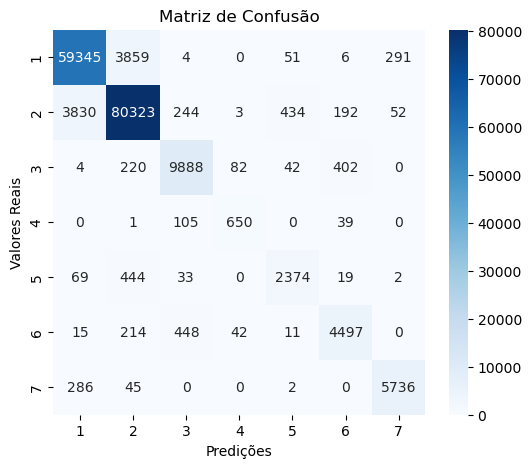

In [10]:
cm = confusion_matrix(y_test, y_pred_dt)
labels = np.unique(y_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Reais')
plt.show()